<h1>VIT Smartbridge AI/ML Assignment 5</h1>
<p>Soma Anirudh 21BCE5537 VIT Chennai</p>
<hr>

<h2>Market Basket Magic: Extracting Insights for Retail Success</h2>
<hr>

Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from glob import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Import and analyze the dataset

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.shape

(200, 5)

In [8]:
df.drop(columns=["CustomerID"],inplace=True)

In [10]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

Univariate Analysis

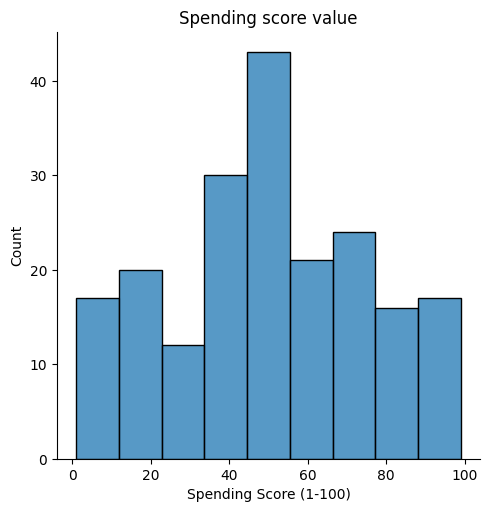

In [15]:
sns.displot(df["Spending Score (1-100)"])
plt.title("Spending score value");

C:\Users\urwit\AppData\Local\Temp\ipykernel_27608\1178764239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


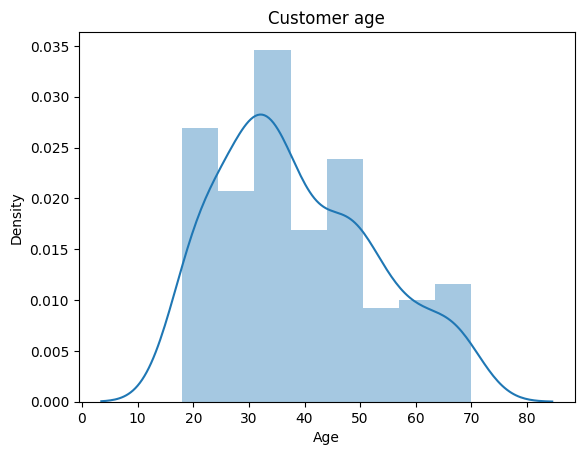

In [17]:
sns.distplot(df["Age"])
plt.title("Customer age");

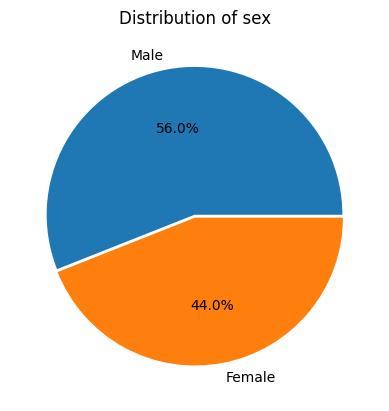

In [23]:
plt.pie(df["Gender"].value_counts(),[0.01,0.01],labels = ["Male","Female"],autopct ='%1.1f%%');
plt.title("Distribution of sex");

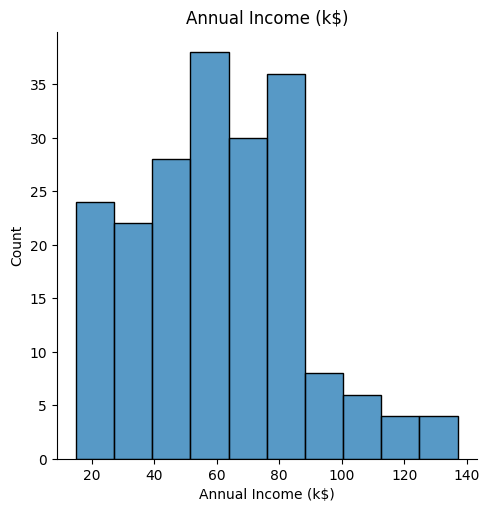

In [24]:
sns.displot(df["Annual Income (k$)"])
plt.title("Annual Income (k$)");

Bivariate Analysis

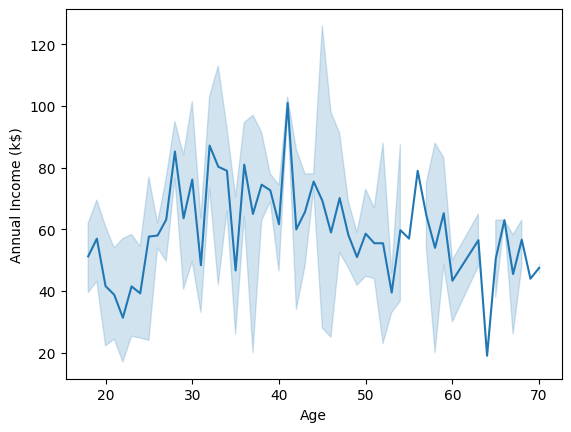

In [26]:
sns.lineplot(x='Age', y='Annual Income (k$)', data=df)
plt.show()

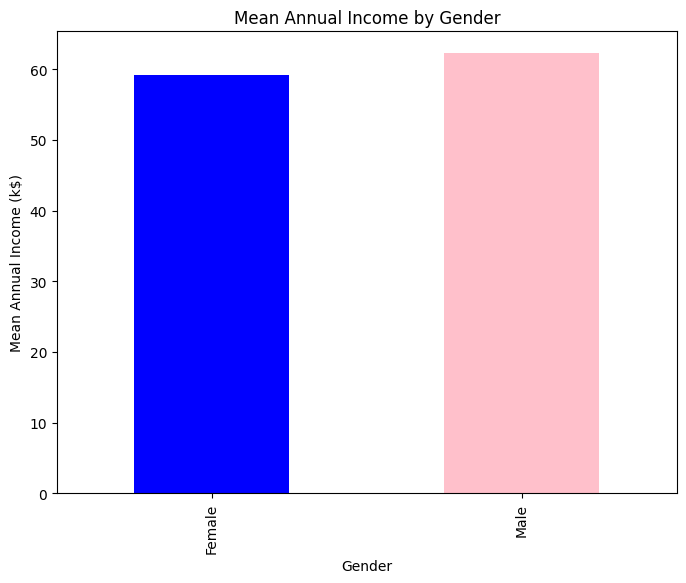

In [27]:
grouped_data = df.groupby('Gender')['Annual Income (k$)'].mean()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income (k$)')
plt.title('Mean Annual Income by Gender')
plt.show()

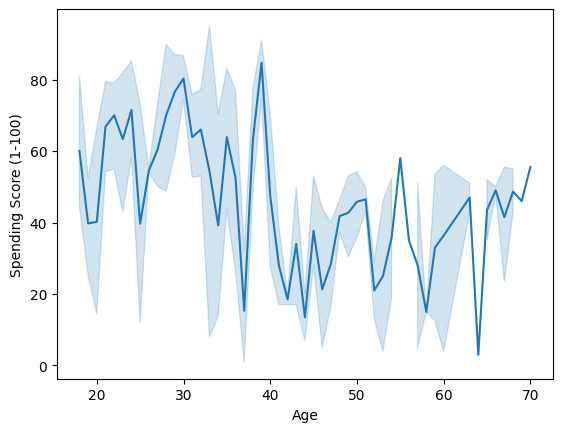

In [28]:
sns.lineplot(x='Age', y='Spending Score (1-100)', data=df)
plt.show()

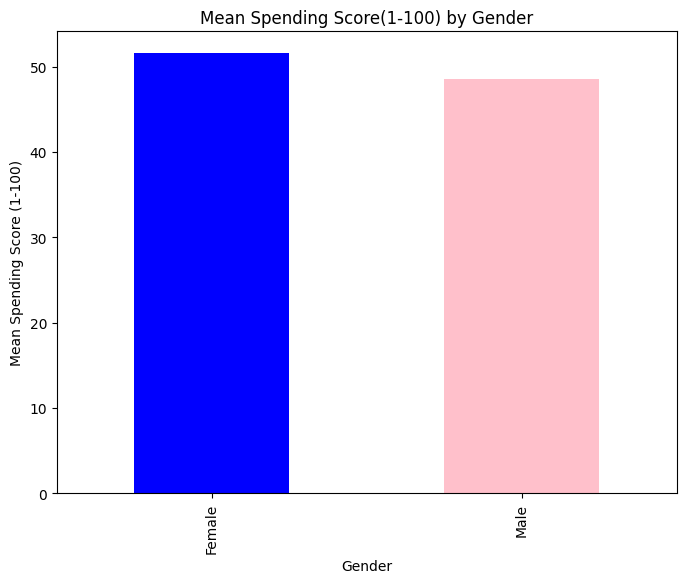

In [30]:
grouped = df.groupby('Gender')['Spending Score (1-100)'].mean()
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Score(1-100) by Gender')
plt.show()

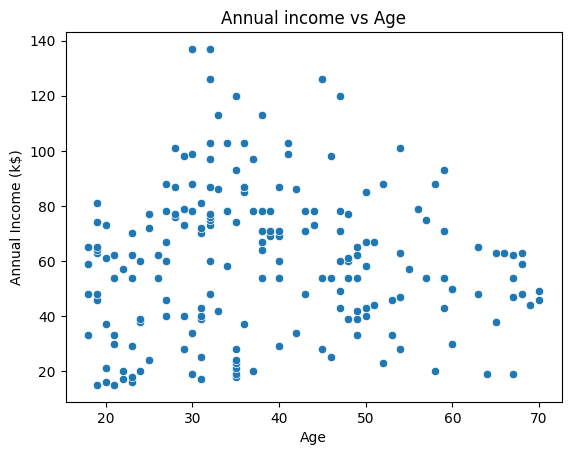

In [32]:
sns.scatterplot(x=df["Age"],y=df["Annual Income (k$)"])
plt.title("Annual income vs Age");

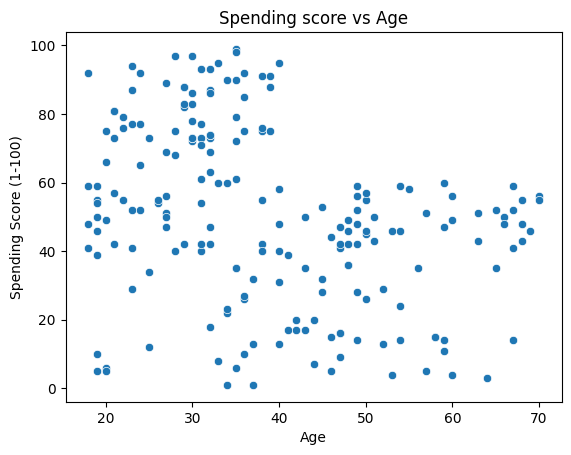

In [33]:
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"])
plt.title("Spending score vs Age");

Multivariate Analysis

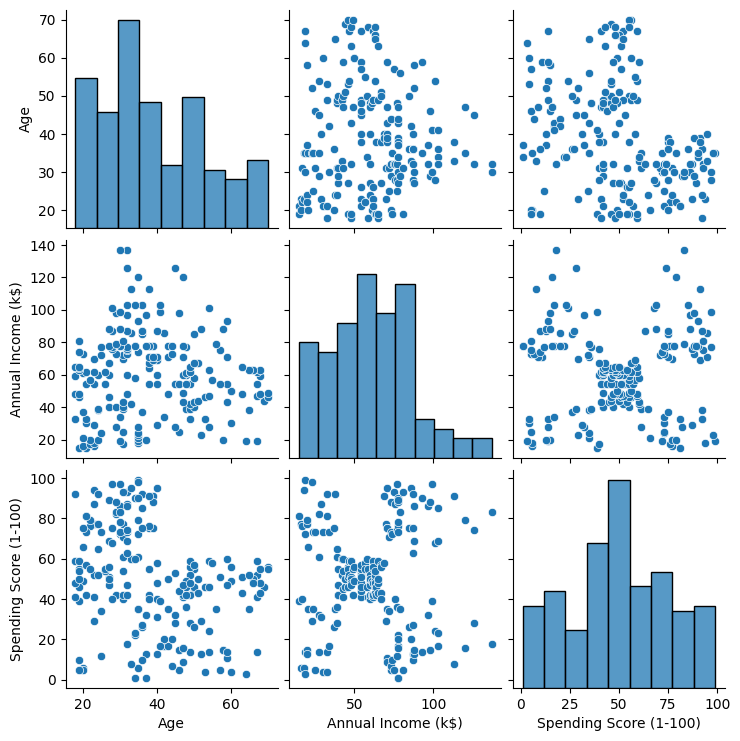

In [35]:
sns.pairplot(df)

<Axes: >

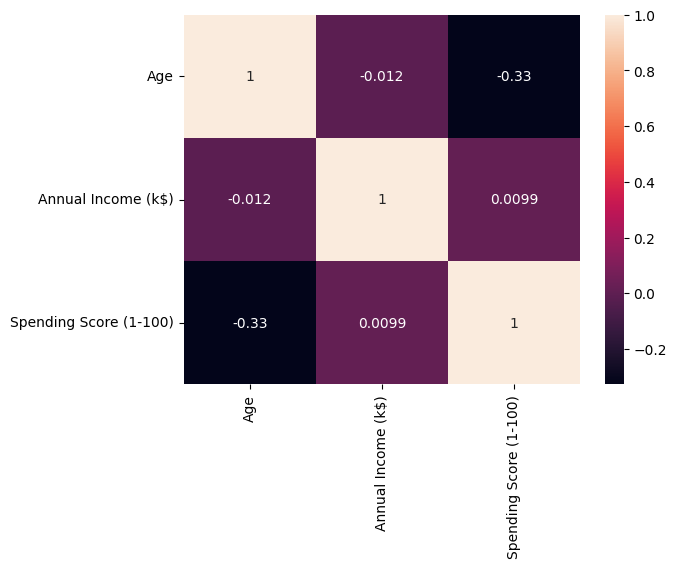

In [38]:
cor=df.corr()
sns.heatmap(cor,annot=True)

Data preprcessing

In [39]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [40]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

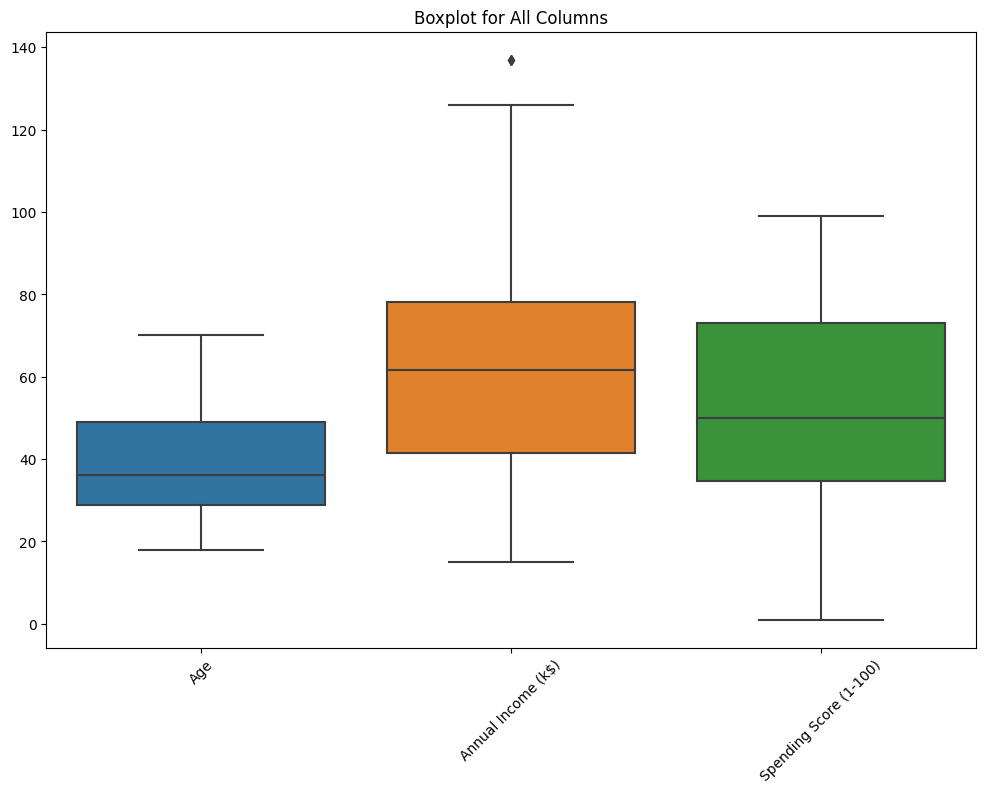

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns')
plt.show()

In [47]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
# Replace outliers with NaN
df['Annual Income (k$)'] = np.where((df['Annual Income (k$)'] > upper_limit) | (df['Annual Income (k$)'] < lower_limit), np.nan, df['Annual Income (k$)'])


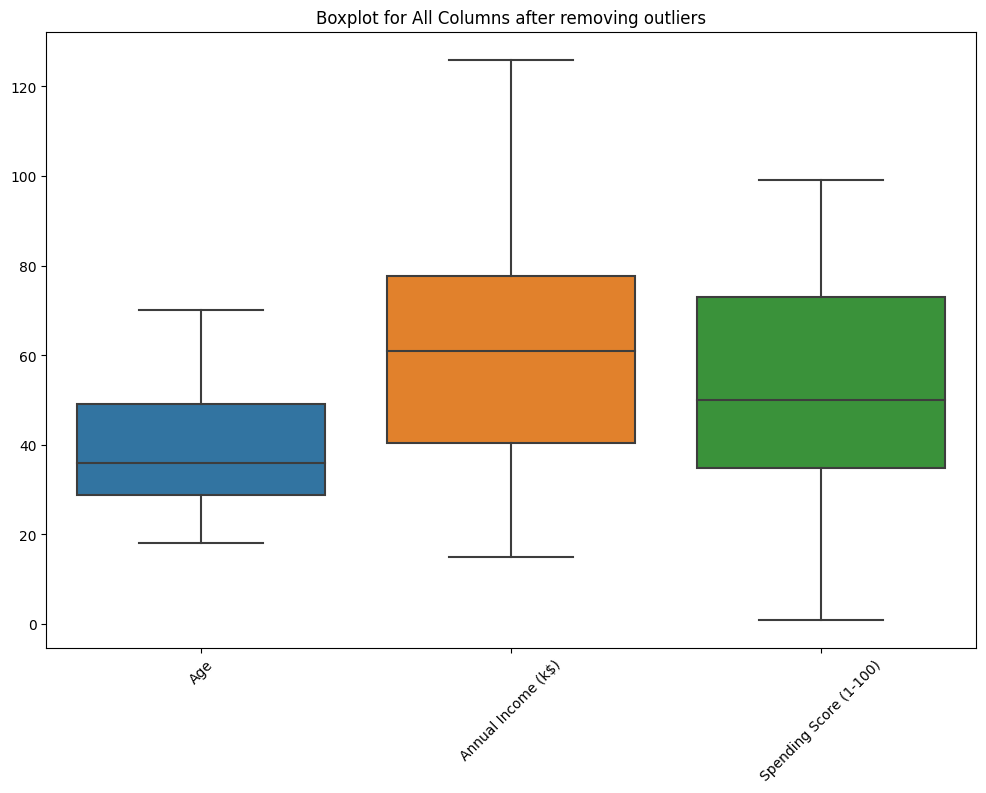

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns after removing outliers')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
5,0,22,17.0,76
6,0,35,18.0,6
7,0,23,18.0,94
8,1,64,19.0,3
9,0,30,19.0,72


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [56]:
from sklearn.impute import SimpleImputer

# Create an imputer with the strategy 'mean' (you can choose other strategies as needed)
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_scaled)


Model Building and eval

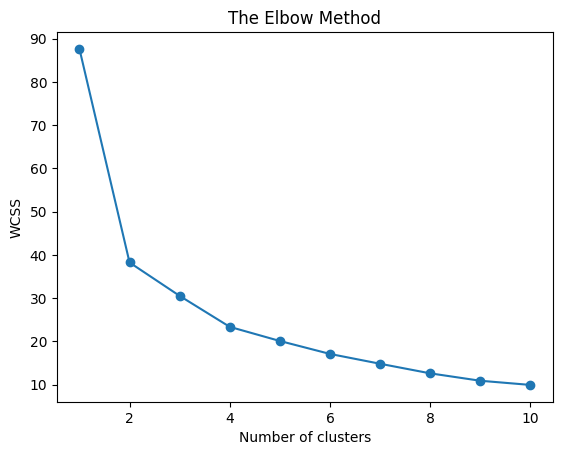

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled_imputed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4,init = 'k-means++',random_state=0)
pred = kmeans.fit(df_scaled_imputed)
pred

KMeans(n_clusters=4, random_state=0)

Testing with random Observations

In [64]:
kmeans.predict([[1,23,17,40]])

array([1])

In [61]:
kmeans.predict([[0,25,10,23]])

array([2])

In [67]:
kmeans.predict([[0,20,20,10]])

array([2])